# Cardiomegaly Disease Prediction Using CNN

**Cardiomegaly, commonly known as an enlarged heart, is not a disease itself but a symptom of various underlying health conditions. It is characterized by an increase in the size of the heart, which can be identified through imaging techniques such as X-rays, echocardiograms, or CT scans.**
**Identifying cardiomegaly using an X-ray involves examining the size and shape of the heart in relation to the chest cavity. Here are the steps typically taken to identify cardiomegaly on an X-ray:**

**1.Obtain the X-ray: A standard chest X-ray is taken, usually in a posterior-anterior (PA) view, where the X-ray beam passes from the back to the front of the chest. A lateral view (side view) may also be taken.**

**2.Assess the Cardiac Silhouette: The heart's outline, known as the cardiac silhouette, is examined.**

**3.Measure the Cardiothoracic Ratio (CTR):**

   **-Measure the Width of the Heart: Find the widest point of the heart on the X-ray.**
     
   **-Measure the Width of the Thorax (Chest): Measure the internal width of the chest at the level of the diaphragm.**
     
   **4.Calculate the CTR: The CTR is calculated by dividing the width of the heart by the width of the thorax. A normal CTR is usually less than 0.5 (or 50%). A CTR greater than 0.5 may indicate cardiomegaly.**
     
**5.Evaluate Heart Borders: The borders of the heart should be clear. Blurred borders may suggest additional issues such as pericardial effusion (fluid around the heart).**

**Check for Other Signs: Look for other signs that may accompany cardiomegaly, such as:**
**
    **Pulmonary congestion (fluid in the lungs)**
    **Enlarged pulmonary vessels
    Presence of other chest abnormalities**

**Normal Heart Size: The heart occupies less than half of the chest cavity width.**

**Enlarged Heart (Cardiomegaly): The heart occupies more than half of the chest cavity width.**

# Why Deep Learning

#### With advancements in machine learning and artificial intelligence, particularly in the field of deep learning, there is an opportunity to enhance diagnostic accuracy and efficiency. Convolutional Neural Networks (CNNs), a class of deep learning models designed specifically for image analysis, offer a promising approach to automating the detection of cardiomegaly from chest X-ray images

#### CNNs excel at identifying and learning complex patterns in visual data. By leveraging these models, we can develop an automated system capable of analyzing X-ray images to determine the presence of cardiomegaly with high accuracy. This system can assist healthcare professionals by providing a reliable preliminary diagnosis, thereby streamlining the diagnostic process and improving patient outcomes.

## This project aims to build and evaluate a CNN-based model to classify X-ray images into categories of cardiomegaly (true) and no cardiomegaly (false). The key objectives are:

1.Data Preparation: Curate and preprocess a dataset of X-ray images, ensuring they are appropriately labeled and formatted for CNN analysis.**
    **Model Development: Design a CNN architecture tailored to detect cardiomegaly from X-ray images, incorporating techniques such as data augmentation to enhance model robustness.**
    **Training and Evaluation: Train the CNN model using the prepared dataset and evaluate its performance based on accuracy, precision, recall, and other relevant metrics.**
    **Deployment: Create a user-friendly interface for healthcare professionals to utilize the model in clinical settings, facilitating more efficient and accurate diagnoses.**
    **Through this project, we aim to demonstrate the potential of CNNs in medical imaging and contribute to the advancement of automated diagnostic tools in cardiology.**

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from PIL import Image
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical,plot_model
import os

In [189]:
# encoder=OneHotEncoder()
# encoder.fit([[0],[1]])
# # 1=true
# # 0=false

In [190]:
# # Data SEt Creation
# data=[]
# paths=[]
# result=[]
# for r,d,f in os.walk(r"E:\Data Science Internship\Cardiomegaly Disease\test\true"):
#   for file in f:
#     if'.png' in file:
#       paths.append(os.path.join(r,file))
# for path in paths:
#     img=Image.open(path)
#     img=img.resize((128,128))
#     img=np.array(img)#extracting pixel values from image object
#     if(img.shape==(128,128,1)):
#         data.append(np.array(img))
#         result.append(encoder.transform([[1]]).toarray())


In [191]:
# # Data SEt Creation
# data=[]
# paths=[]
# result=[]
# for r,d,f in os.walk(r"E:\Data Science Internship\Cardiomegaly Disease\test\false"):
#   for file in f:
#     if'.png' in file:
#       paths.append(os.path.join(r,file))
# for path in paths:
#     img=Image.open(path)
#     img=img.resize((128,128))
#     img=np.array(img)#extracting pixel values from image object
#     if(img.shape==(128,128,1)):
#         data.append(np.array(img))
#         result.append(encoder.transform([[0]]).toarray())


In [192]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import OneHotEncoder

# Initialize encoder
encoder = OneHotEncoder(sparse=False)
encoder.fit([[0], [1]])

# Function to load images
def load_images_from_folder(folder, label):
    data = []
    result = []
    paths = []
    for r, d, f in os.walk(folder):
        for file in f:
            if '.png' in file:
                paths.append(os.path.join(r, file))
    for path in paths:
        img = Image.open(path).convert('L')  # Convert image to grayscale
        img = img.resize((128, 128))
        img = np.array(img,dtype='float32')/255.0  # Extracting pixel values from image object
        img = np.expand_dims(img, axis=-1)  # Add channel dimension
        data.append(img)
        result.append(encoder.transform([[label]]))
    return data, result

# Load true and false images
true_data, true_result = load_images_from_folder(r"E:\Data Science Internship\Cardiomegaly Disease\test\test\true", 1)
false_data, false_result = load_images_from_folder(r"E:\Data Science Internship\Cardiomegaly Disease\test\test\false", 0)

# Combine data and results
data = np.array(true_data + false_data)
result = np.array(true_result + false_result).reshape(-1, 2)  # Reshape to match one-hot encoding shape


C:\Users\ANSHAD\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [193]:
data=np.array(true_data+false_data)#list to array conversion

data.shape

(814, 128, 128, 1)

In [194]:
result=np.array(true_result+false_result)
result=result.reshape(814,2)
print("Result shape:", result.shape)


Result shape: (814, 2)


In [195]:
print("One-hot encoding example:", encoder.transform([[1]]))  # Should output [0, 1]


One-hot encoding example: [[0. 1.]]


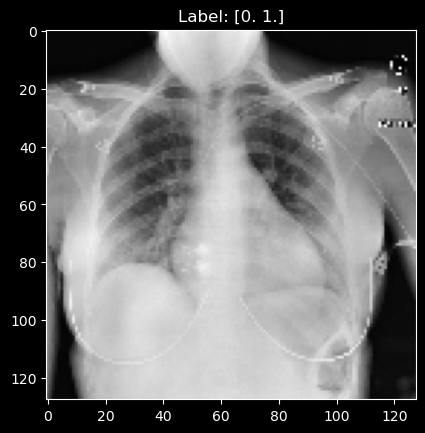

In [196]:
import matplotlib.pyplot as plt

# Visualize a sample image
plt.imshow(data[0].reshape(128, 128), cmap='gray')
plt.title(f"Label: {result[0]}")
plt.show()


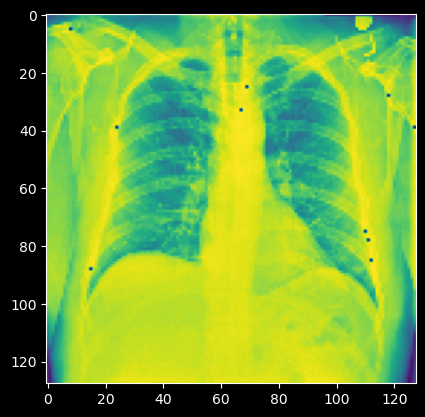

In [197]:
plt.imshow(data[677])

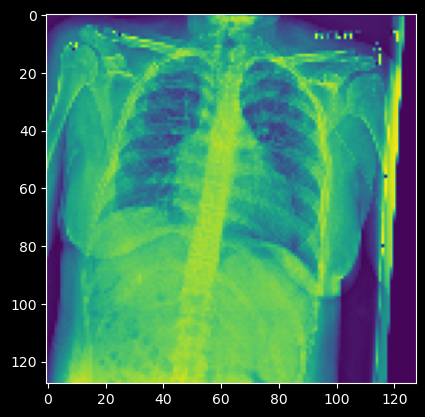

In [198]:
plt.imshow(data[78])

In [199]:
X_train,X_test,y_train,y_test=train_test_split(data,result,test_size=0.2,shuffle=True,random_state=0)

In [200]:
print("X_train shape:", X_train.shape)  # Expected: (651, 128, 128, 1)
print("y_train shape:", y_train.shape)  # Expected: (651, 2)
print("X_test shape:", X_test.shape)    # Expected: (163, 128, 128, 1)
print("y_test shape:", y_test.shape)    # Expected: (163, 2)

X_train shape: (651, 128, 128, 1)
y_train shape: (651, 2)
X_test shape: (163, 128, 128, 1)
y_test shape: (163, 2)


In [201]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(128, 128,1),activation='relu', padding = 'Same',kernel_regularizer=l2(0.001)))
model.add(Conv2D(32, kernel_size=(3, 3),  activation ='relu', padding = 'Same',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, kernel_size = (3,3), activation ='relu', padding = 'Same',kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, kernel_size = (3,3), activation ='relu', padding = 'Same',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

print(model.summary())

C:\Users\ANSHAD\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)                   │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_52 (Dropout)                 │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_53 (Dropout)                 │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_54 (Dropout)                 │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 512)                 │      33,554,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_55 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,621,346 (128.26 MB)

 Trainable params: 33,621,154 (128.25 MB)

 Non-trainable params: 192 (768.00 B)

None


In [202]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [203]:
X_train.shape

(651, 128, 128, 1)

In [204]:
y_train.shape

(651, 2)

Model Training

In [205]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)


Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.5313 - loss: 25.9884 - val_accuracy: 0.4969 - val_loss: 2.3338
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.5994 - loss: 6.3368 - val_accuracy: 0.5951 - val_loss: 1.1536
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.6177 - loss: 1.8328 - val_accuracy: 0.5031 - val_loss: 7.0640
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.6329 - loss: 1.0421 - val_accuracy: 0.5644 - val_loss: 6.9932
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.6671 - loss: 0.9254 - val_accuracy: 0.5460 - val_loss: 16.7660
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.7168 - loss: 0.7422 - val_accuracy: 0.5460 - val_loss: 16.3515
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.7079 - loss: 0.7004 - val_accuracy: 0.5460 - val_loss: 22.6692


In [206]:
score=model.evaluate(X_test,y_test,batch_size=64)
print("\n Test accuracy:%.1f%%" % (100.0*score[1]))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step - accuracy: 0.5749 - loss: 1.2346

 Test accuracy:59.5%


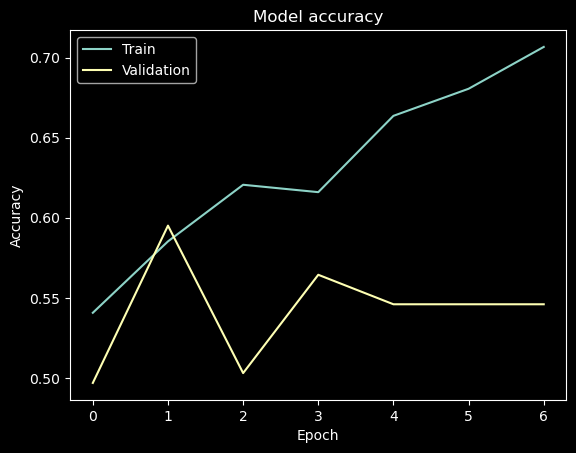

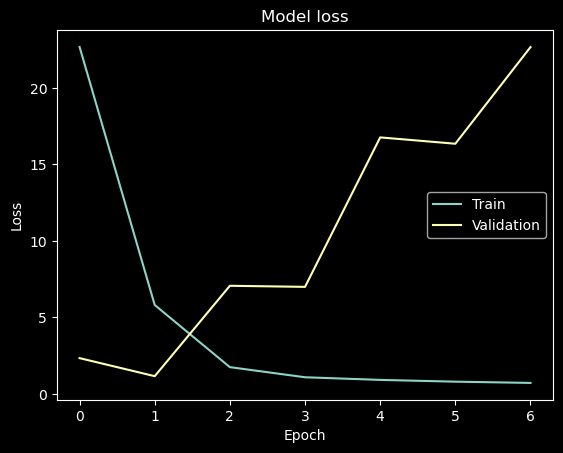

In [207]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()
